# Computational finance set 3
Sander Broos, Nick van Santen

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from finite_diff import FiniteDiff, black_scholes_formula

In [2]:
# Run cell to increase font sizes. Usefull when saving plots
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,6)

## Part 2

In [3]:
# Compute finite difference grid for FTCS and CN

Nt = 2000
NX = 2000

field_FTCS = FiniteDiff(propagate_scheme="FTCS", Nt=Nt, NX=NX)
field_CN = FiniteDiff(propagate_scheme="CN", Nt= Nt, NX=NX)

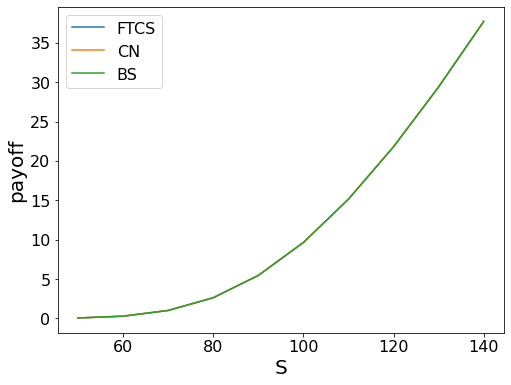

In [4]:
# Plot option price as a function of S0 for FTCS, CN and BS

payoffs_FTCS = []
payoffs_CN = []
payoffs_BS = []

Ss = np.arange(50, 150, 10)
for S in Ss:

    payoffs_FTCS.append(field_FTCS.get_payoff_for_S(S))
    payoffs_CN.append(field_CN.get_payoff_for_S(S))
    payoffs_BS.append(black_scholes_formula(S=S)[0])

plt.plot(Ss, payoffs_FTCS, label="FTCS")
plt.plot(Ss, payoffs_CN, label="CN")
plt.plot(Ss, payoffs_BS, label="BS")

plt.xlabel("S")
plt.ylabel("payoff")

plt.legend()
plt.show()

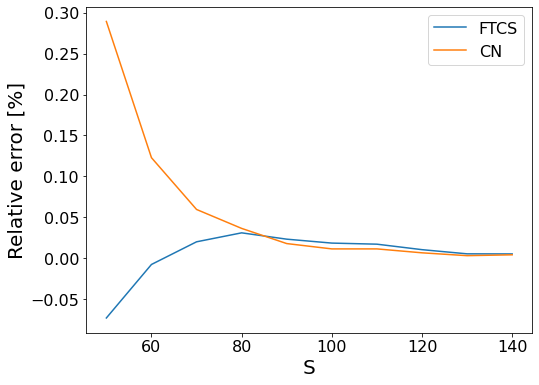

In [5]:
# Compare relative errors of option price compared to BS

relative_error_FTCS = []
relative_error_CN = []

def relative_error(exact, approx):

    return (approx - exact) / exact * 100

for i in range(len(payoffs_BS)):

    relative_error_FTCS.append(relative_error(payoffs_BS[i], payoffs_FTCS[i]))
    relative_error_CN.append(relative_error(payoffs_BS[i], payoffs_CN[i]))

plt.plot(Ss, relative_error_FTCS, label="FTCS")
plt.plot(Ss, relative_error_CN, label="CN")

plt.xlabel("S")
plt.ylabel("Relative error [%]")

plt.legend()
plt.show()

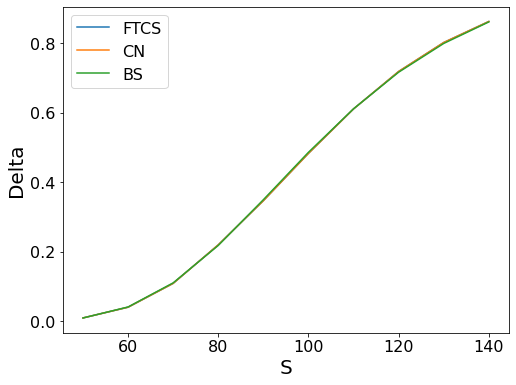

In [6]:
# Plot delta as a function of S0 for FTCS, CN and BS

deltas_FTCS = []
deltas_CN = []
deltas_BS = []

Ss = np.arange(50, 150, 10)
for S in Ss:

    deltas_FTCS.append(field_FTCS.calc_delta(S))
    deltas_CN.append(field_CN.calc_delta(S))
    deltas_BS.append(black_scholes_formula(S=S)[1])

plt.plot(Ss, deltas_FTCS, label="FTCS")
plt.plot(Ss, deltas_CN, label="CN")
plt.plot(Ss, deltas_BS, label="BS")

plt.xlabel("S")
plt.ylabel("Delta")

plt.legend()
plt.show()

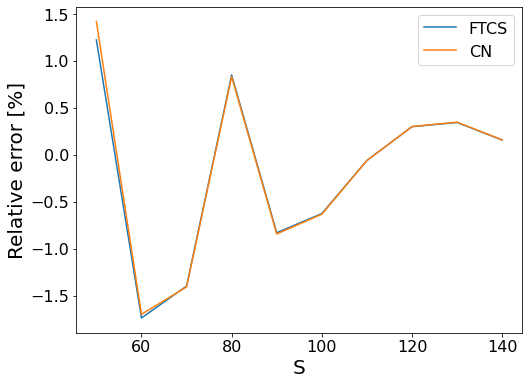

In [7]:
# Compare relative errors of delta compared to BS

relative_error_delta_FTCS = []
relative_error_delta_CN = []

def relative_error(exact, approx):

    return (approx - exact) / exact * 100

for i in range(len(deltas_BS)):

    relative_error_delta_FTCS.append(relative_error(deltas_BS[i], deltas_FTCS[i]))
    relative_error_delta_CN.append(relative_error(deltas_BS[i], deltas_CN[i]))

plt.plot(Ss, relative_error_delta_FTCS, label="FTCS")
plt.plot(Ss, relative_error_delta_CN, label="CN")

plt.xlabel("S")
plt.ylabel("Relative error [%]")

plt.legend()
plt.show()